In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

births = pd.read_csv('births.csv')

In [2]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
births['decade'] = 10 * (births['year'] // 10)
#기존 데이터에 decade 속성을 추가. 추후 연산은 이걸 기반으로 작동
#births.head()
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
#aggfunc sum을 통해 합침

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [4]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


Text(0, 0.5, 'total births per year')

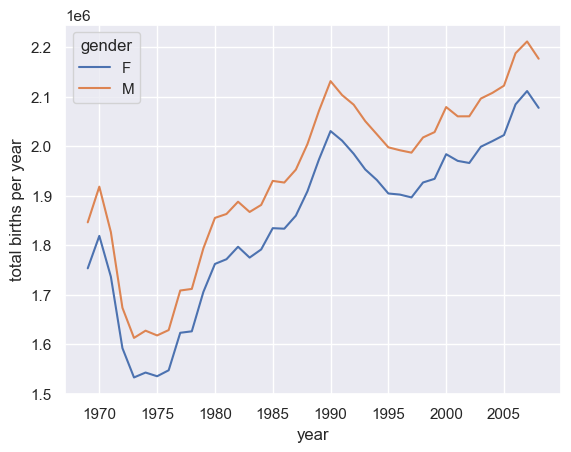

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

Text(0, 0.5, 'total births by day')

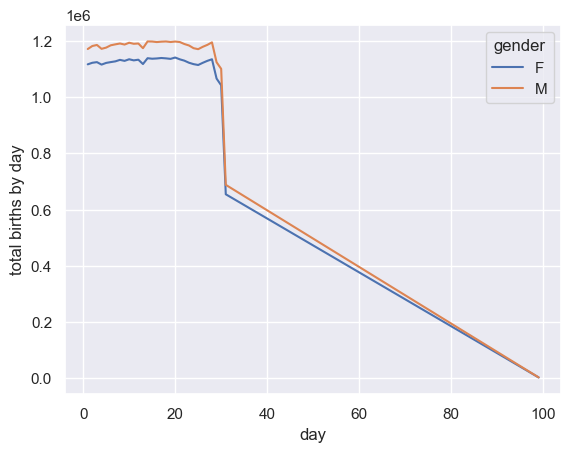

In [7]:
## 정제되지 않은 데이터임을 확인할 수 있음
## 위의 코드를 아주 약간만 변형하여 매 날마다 태어난 아이의 수 계산. 의미는 없는 값임

%matplotlib inline
sns.set()
births.pivot_table('births', index='day', columns='gender', aggfunc='sum').plot()
#births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births by day')

In [6]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])